# Description: Predicting Ethereum Price with Python and Machine Learning

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import seaborn as sns
import numpy as np
import re 
# RegEx: Regular expression

import mplfinance as mpf
import pandas_datareader as web

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')






In [2]:
import pandas as pd
df = pd.read_csv('ethereum_2015-08-07_2024-06-02.csv')
df = df.set_index(pd.DatetimeIndex(df['Start'].values))
display(df)





,Start,End,Open,High,Low,Close,Volume,Market Cap
2024-06-01,2024-06-01,2024-06-02,2948.742856,2978.306538,2941.392797,2971.467374,1.519628e+10,3.558701e+11
2024-05-31,2024-05-31,2024-06-01,2940.157084,2992.084249,2925.939443,2947.755919,1.673715e+10,3.544224e+11
2024-05-30,2024-05-30,2024-05-31,2953.729354,2981.526565,2913.709414,2940.947921,1.754862e+10,3.542934e+11
2024-05-29,2024-05-29,2024-05-30,3000.900270,3021.146455,2938.025184,2951.882733,1.889175e+10,3.575360e+11
2024-05-28,2024-05-28,2024-05-29,3028.869403,3045.442442,2962.778842,3000.077482,1.966750e+10,3.614046e+11
...,...,...,...,...,...,...,...,...
2015-08-12,2015-08-12,2015-08-13,0.838300,1.012639,0.693657,0.971606,1.547950e+06,5.246035e+07
2015-08-11,2015-08-11,2015-08-12,0.556151,0.888188,0.520658,0.830301,5.029142e+05,3.743174e+07
2015-08-10,2015-08-10,2015-08-11,0.551009,0.572956,0.499706,0.555567,3.593449e+05,3.283582e+07
2015-08-09,2015-08-09,2015-08-10,0.591381,0.690675,0.493933,0.572558,5.493833e+05,3.262780e+07


In [3]:
future_days = 60

#Create a new column (target) shifted 'x' units/days up
df[str(future_days) + '_Day_Price_Forecast'] = df [['Close']].shift(-future_days)
#Show the data
display(df[['Close', str(future_days)+'_Day_Price_Forecast']])

,Close,60_Day_Price_Forecast
2024-06-01,2971.467374,2574.545783
2024-05-31,2947.755919,2756.781150
2024-05-30,2940.947921,2868.217516
2024-05-29,2951.882733,2762.624741
2024-05-28,3000.077482,2763.693242
...,...,...
2015-08-12,0.971606,NaN
2015-08-11,0.830301,NaN
2015-08-10,0.555567,NaN
2015-08-09,0.572558,NaN


In [4]:

x = np.array(df[['Close']])
x = x[:df.shape[0]-future_days]
print(x)


[[2.97146737e+03]
 [2.94775592e+03]
 [2.94094792e+03]
 ...
 [5.11384475e-01]
 [4.86041418e-01]
 [4.78269641e-01]]


In [5]:
y = np.array(df[[str(future_days)+'_Day_Price_Forecast']])
y = y[:-future_days]
print(y)


[[2.57454578e+03]
 [2.75678115e+03]
 [2.86821752e+03]
 ...
 [5.55566633e-01]
 [5.72557778e-01]
 [5.61197639e-01]]


In [6]:
#split the data into training and testing
from sklearn.model_selection import train_test_split    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [7]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

c:\Users\Student\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, gamma=1e-05)

In [8]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)

svr_rbf accuracy: 0.8579149025362502


In [10]:
svm_predict = svr_rbf.predict(x_test)
print(svm_predict)

[1.39202986e+03 8.49447858e+00 1.54409786e+02 2.21282487e+02
 1.39313895e+03 6.52626163e+00 5.26258267e+02 1.02517689e+02
 1.16675582e+03 3.99065682e+02 1.64591908e+02 2.03900641e+02
 1.39417520e+03 1.12768152e+03 2.20884517e+03 5.27165391e+02
 2.19832098e+03 1.09847981e+03 2.69270873e+03 2.44785203e+02
 4.97488115e+02 6.98870567e+00 7.83588858e+02 4.34784304e+02
 2.39904824e+02 2.13441475e+02 2.24749132e+03 1.52130088e+02
 1.84140353e+03 1.64374913e+02 1.35740705e+03 1.09199428e+03
 8.27259763e+00 1.05196759e+03 1.88906429e+02 8.44254083e+01
 3.81404051e+02 4.89038686e-01 1.13784306e+03 2.02458329e+03
 1.35350602e+02 1.66743815e+02 1.91772256e+02 1.60002329e+02
 6.90194592e+00 1.39680164e+03 1.19573318e+02 1.39251976e+03
 1.60130110e+03 6.10386290e+00 3.93685191e+02 1.71815761e+02
 1.67727082e+02 7.35651496e+00 1.84405944e+02 1.87159775e+03
 1.05434469e+02 1.53206766e+02 1.88827267e+03 1.83675441e+02
 1.05277709e+02 1.97285238e+03 4.01784378e+00 2.58648399e+02
 1.35514942e+02 2.249704

In [11]:
print(y_test)

[[2.31271410e+03]
 [6.68404980e+00]
 [1.08356305e+02]
 [2.62450500e+02]
 [1.31121028e+03]
 [6.65584375e+00]
 [4.04064366e+02]
 [1.77459653e+02]
 [1.22007473e+03]
 [3.25972805e+02]
 [1.13762526e+02]
 [2.38553039e+02]
 [1.27262294e+03]
 [1.20906079e+03]
 [2.85431082e+03]
 [5.91774517e+02]
 [2.47066020e+03]
 [1.29108036e+03]
 [2.56954916e+03]
 [1.91423048e+02]
 [6.01205427e+02]
 [7.72106387e+00]
 [2.72528821e+02]
 [2.34056300e+02]
 [6.23433390e+02]
 [1.24826854e+02]
 [3.03930965e+03]
 [1.76656619e+02]
 [1.81175587e+03]
 [1.95254506e+02]
 [1.42790162e+03]
 [3.42338410e+02]
 [1.16755637e+01]
 [1.13583959e+03]
 [3.68079037e+02]
 [3.48104943e+01]
 [7.28357971e+02]
 [4.77475978e-01]
 [8.91094643e+02]
 [1.94023692e+03]
 [8.44625006e+01]
 [1.34349426e+02]
 [5.99620832e+01]
 [1.17981784e+02]
 [2.93390065e+00]
 [1.28683508e+03]
 [1.33505277e+02]
 [1.28052872e+03]
 [1.39970059e+03]
 [8.78697482e+00]
 [3.27340928e+02]
 [1.66757314e+02]
 [3.23254442e+02]
 [7.92517114e+00]
 [1.37197066e+02]
 [2.422099

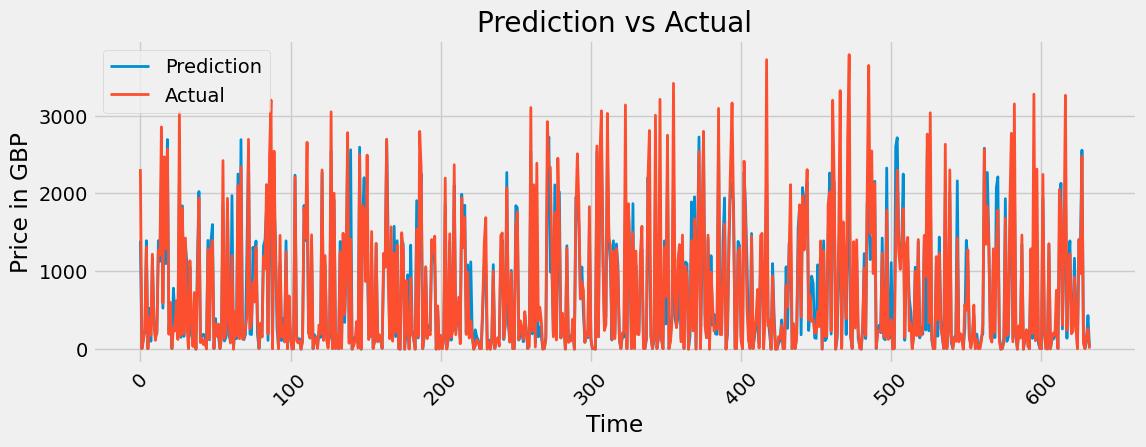

In [17]:
plt.figure(figsize=(12,4))
plt.plot(svm_predict, label ='Prediction', lw=2, alpha=1.0)
plt.plot(y_test, label ='Actual', lw=2, alpha=1.0)
plt.title('Prediction vs Actual')
plt.ylabel('Price in GBP')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()